In [ ]:
!pip install qiskit
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.4 MB/s eta 0:00:00


In [ ]:
# Deutsch–Jozsa Algorithm using Qiskit 2.x
# Compatible with Qiskit >= 2.0.0

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [ ]:
# ---------- ORACLES ----------
def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)




In [ ]:
# ---------- DEUTSCH–JOZSA CIRCUIT ----------
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    """
    n: number of input qubits
    oracle_func: oracle function to modify the circuit
    oracle_args: extra arguments for oracle
    """
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc


In [ ]:
# ---------- EXECUTION ----------
def run_dj(qc):
    """Run Deutsch–Jozsa circuit on AerSimulator"""
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) == 1024:
        print("Function is CONSTANT")
    else:
        print("Function is BALANCED")


In [ ]:
# ---------- MAIN ----------
if __name__ == "__main__":
    n = 3  # number of input qubits

    print("\n=== Constant Oracle (f(x)=0) ===")
    qc_const = deutsch_jozsa_circuit(
        n, oracle_constant, n, 0
    )
    print(qc_const.draw(fold=-1))
    run_dj(qc_const)

    print("\n=== Balanced Oracle (Parity) ===")
    qc_balanced = deutsch_jozsa_circuit(
        n, oracle_balanced_parity, list(range(n)), n
    )
    print(qc_balanced.draw(fold=-1))
    run_dj(qc_balanced)



=== Constant Oracle (f(x)=0) ===
     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 
Measurement counts: {'000': 1024}
Function is CONSTANT

=== Balanced Oracle (Parity) ===
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 
Measurement counts: {'111': 1024}
Function is BALANCED


Task 1:


=== Custom Balanced Oracle ===
     ┌───┐          ┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤┌───┐└╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├─╫─┤M├───
     ├───┤└───┘  │  └───┘├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├───────┼────■──┤ H ├─╫──╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├──────╫──╫──╫─
     └───┘└───┘└───┘└───┘      ║  ║  ║ 
c: 3/══════════════════════════╩══╩══╩═
                               0  1  2 
Measurement counts: {'101': 257, '100': 251, '111': 268, '110': 248}


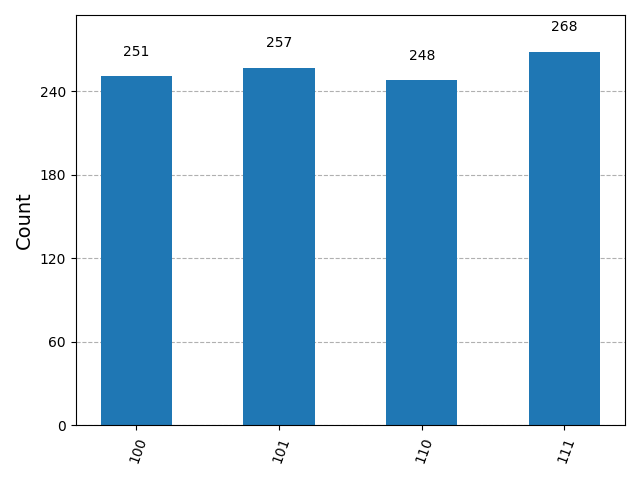

Function is BALANCED (Custom Oracle)


In [ ]:
%matplotlib inline
# Custom Balanced Oracle
def oracle_balanced_custom(qc, inputs, ancilla):
    """
    Custom balanced oracle:
    f(x0,x1,x2) flips ancilla for exactly half the inputs.
    Here: f(x) = 1 when (x0 AND NOT x1) OR (x2)
    """
    qc.x(inputs[1])                # invert x1
    qc.ccx(inputs[0], inputs[1], ancilla)  # if x0=1 and x1=0 → flip ancilla
    qc.x(inputs[1])                # restore x1
    qc.cx(inputs[2], ancilla)      # also flip if x2=1  → total 4 of 8 cases

# Deutsch–Jozsa Circuit Builder
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    oracle_func(qc, *oracle_args)

    for q in inputs:
        qc.h(q)

    qc.measure(inputs, creg)
    return qc

# Run Deutsch–Jozsa with Custom Oracle
n = 3
qc_custom = deutsch_jozsa_circuit(n, oracle_balanced_custom, list(range(n)), n)

print("\n=== Custom Balanced Oracle ===")
print(qc_custom.draw(fold=-1))

# Simulate
sim = AerSimulator()
tqc = transpile(qc_custom, sim)
result = sim.run(tqc, shots=1024).result()
counts = result.get_counts()

print("Measurement counts:", counts)

# Force Histogram Display as Image
fig = plot_histogram(counts)
fig.savefig("dj_custom_hist.png")
plt.close(fig)
display(Image("dj_custom_hist.png"))

# Result Interpretation
if counts.get("0" * n, 0) == 1024:
    print("Function is CONSTANT")
else:
    print("Function is BALANCED (Custom Oracle)")


Task 2:


=== Deutsch–Jozsa with 2 Input Qubits ===
     ┌───┐          ┌───┐     ┌─┐   
q_0: ┤ H ├───────■──┤ H ├─────┤M├───
     ├───┤       │  └───┘┌───┐└╥┘┌─┐
q_1: ┤ H ├───────┼────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├┤ X ├┤ X ├──────╫──╫─
     └───┘└───┘└───┘└───┘      ║  ║ 
c: 2/══════════════════════════╩══╩═
                               0  1 
Measurement counts: {'11': 1024}


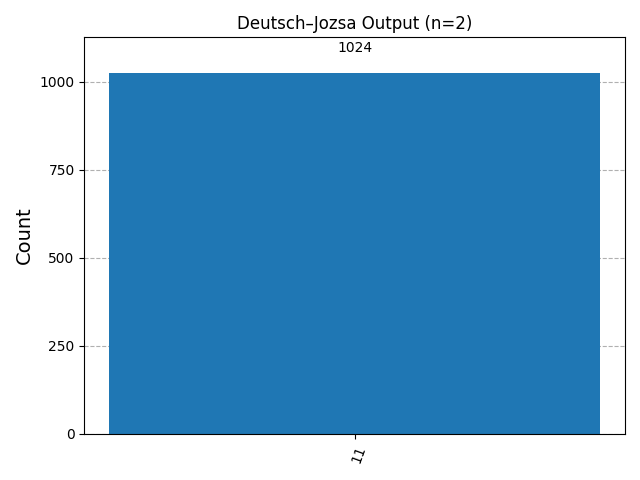


=== Deutsch–Jozsa with 4 Input Qubits ===
     ┌───┐          ┌───┐     ┌─┐                   
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐           
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───────────
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘     ┌─┐   
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫──────┤M├───
     ├───┤       │    │    │   ║ └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────┼────┼───╫───■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫─┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║ └───┘ ║       ║  ║ 
c: 4/══════════════════════════╩═══════╩═══════╩══╩═
                               0       1       2  3 
Measurement counts: {'1111': 1024}


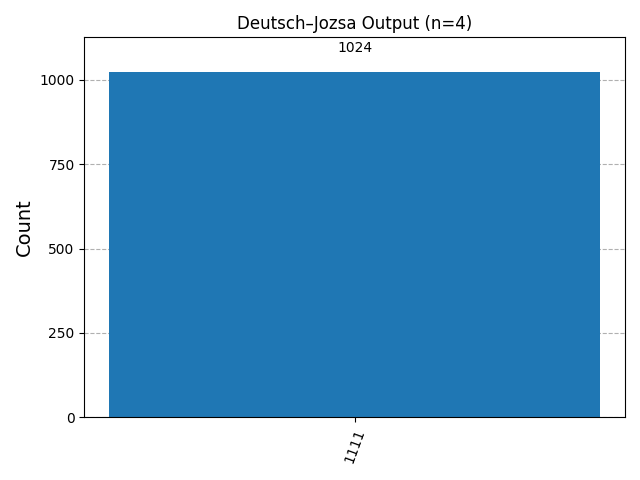


=== Deutsch–Jozsa with 5 Input Qubits ===
     ┌───┐          ┌───┐     ┌─┐                           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────────────────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐                   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───────────────────
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘     ┌─┐           
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫──────┤M├───────────
     ├───┤       │    │    │   ║ └───┘ ║ ┌───┐└╥┘     ┌─┐   
q_3: ┤ H ├───────┼────┼────┼───╫───■───╫─┤ H ├─╫──────┤M├───
     ├───┤       │    │    │   ║   │   ║ └───┘ ║ ┌───┐└╥┘┌─┐
q_4: ┤ H ├───────┼────┼────┼───╫───┼───╫───■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ ┌─┴─┐ ║ └───┘ ║ └╥┘
q_5: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫─┤ X ├─╫─┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║ └───┘ ║ └───┘ ║       ║  ║ 
c: 5/══════════════════════════╩═══════╩═══════╩═══════╩══╩═
                               0       1       2       3  4 
Measurement counts: {'11111': 1024}


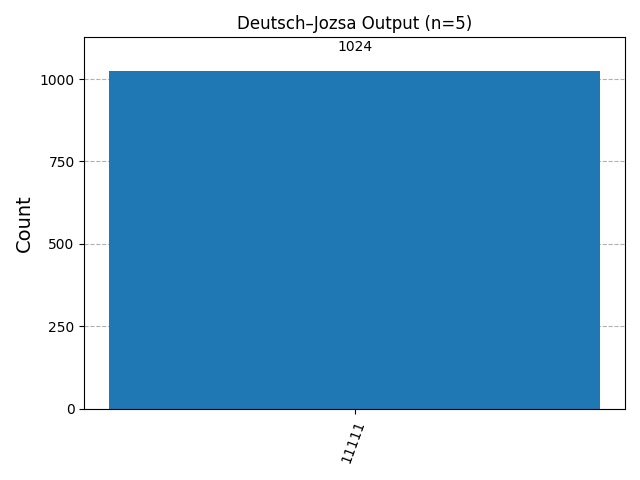

In [ ]:
%matplotlib inline
# Balanced Oracle for N input qubits
def oracle_balanced_parity(qc, inputs, ancilla):
    """
    Balanced oracle for N inputs:
    f(x) = x0 XOR x1 XOR ... XOR xn
    """
    for q in inputs:
        qc.cx(q, ancilla)

# Deutsch–Jozsa Circuit
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # |0...0>|1>
    qc.x(ancilla)
    qc.h(qreg)

    # Apply oracle
    oracle_func(qc, *oracle_args)

    # Hadamard on inputs again
    for q in inputs:
        qc.h(q)

    qc.measure(inputs, creg)
    return qc

# Function to run and visualize
def run_dj_for_n(n):
    print(f"\n=== Deutsch–Jozsa with {n} Input Qubits ===")
    qc = deutsch_jozsa_circuit(n, oracle_balanced_parity, list(range(n)), n)
    print(qc.draw(fold=-1))

    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    print("Measurement counts:", counts)

    # Save and display histogram
    fig = plot_histogram(counts, title=f"Deutsch–Jozsa Output (n={n})")
    filename = f"dj_hist_n{n}.png"
    fig.savefig(filename)
    plt.close(fig)
    display(Image(filename))

# Run for different input sizes
for n in [2, 4, 5]:
    run_dj_for_n(n)

Task 3:


=== Deutsch–Jozsa with Noise (n = 3) ===
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 

Measurement counts (ideal): {'111': 1024}
Measurement counts (noisy): {'100': 3, '110': 23, '001': 28, '010': 2, '000': 28, '101': 33, '011': 52, '111': 855}


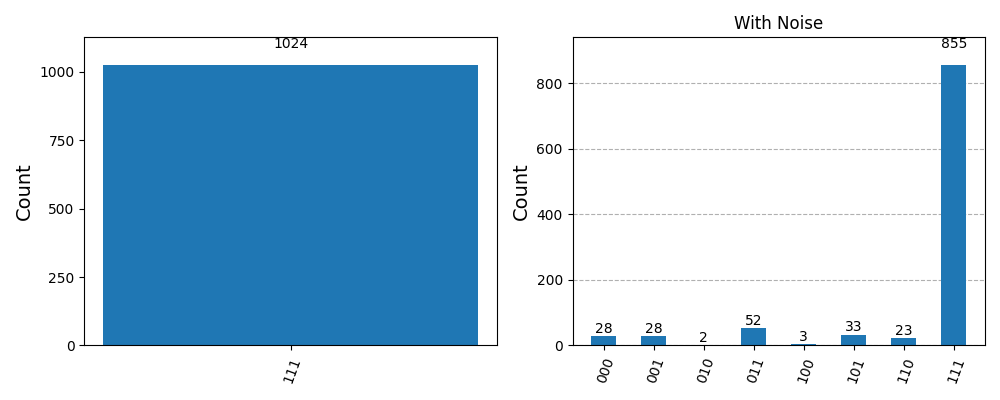

In [ ]:
%matplotlib inline

# Balanced Oracle (same as before)
def oracle_balanced_parity(qc, inputs, ancilla):
    for q in inputs:
        qc.cx(q, ancilla)

# Deutsch–Jozsa Circuit Builder
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    oracle_func(qc, *oracle_args)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

# Function to Run and Plot (Ideal vs Noisy)
def run_with_noise(n):
    print(f"\n=== Deutsch–Jozsa with Noise (n = {n}) ===")
    qc = deutsch_jozsa_circuit(n, oracle_balanced_parity, list(range(n)), n)
    print(qc.draw(fold=-1))

    # ---------- Ideal Simulation ----------
    sim_ideal = AerSimulator()
    qc_ideal = transpile(qc, sim_ideal)
    counts_ideal = sim_ideal.run(qc_ideal, shots=1024).result().get_counts()

    # ---------- Create Noise Model ----------
    noise_model = NoiseModel()

    # Small depolarizing and thermal noise
    noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 1), ['h', 'x'])
    noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cx'])

    # ---------- Noisy Simulation ----------
    sim_noisy = AerSimulator(noise_model=noise_model)
    qc_noisy = transpile(qc, sim_noisy)
    counts_noisy = sim_noisy.run(qc_noisy, shots=1024).result().get_counts()

    # ---------- Display Results ----------
    print("\nMeasurement counts (ideal):", counts_ideal)
    print("Measurement counts (noisy):", counts_noisy)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    plot_histogram(counts_ideal, title="Ideal Results", ax=axes[0])
    plot_histogram(counts_noisy, title="With Noise", ax=axes[1])
    plt.tight_layout()
    filename = f"dj_noise_compare_n{n}.png"
    plt.savefig(filename)
    plt.close(fig)
    display(Image(filename))

# Run for n = 3 input qubits
run_with_noise(3)


Task 4:

     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 


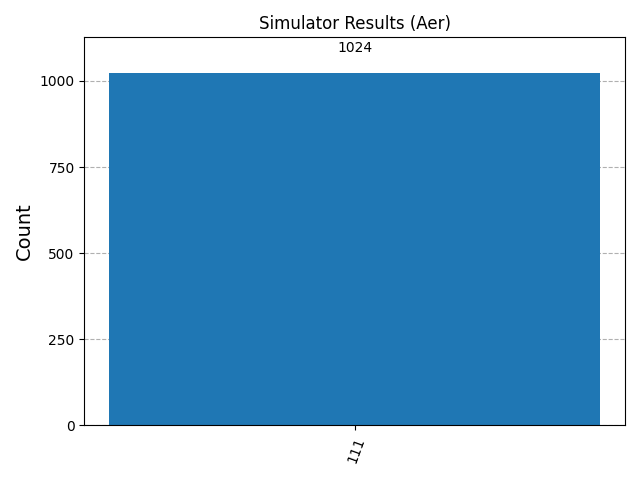

Simulator counts: {'111': 1024}


In [ ]:
# Oracle (Balanced Parity)
def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)


# Deutsch–Jozsa Circuit Builder
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    oracle_func(qc, *oracle_args)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

# Step 1 — Create Circuit
n = 3
qc = deutsch_jozsa_circuit(n, oracle_balanced_parity, list(range(n)), n)
print(qc.draw(fold=-1))

# Step 2 — Run on AerSimulator (reference)
sim = AerSimulator()
tqc = transpile(qc, sim)
result_sim = sim.run(tqc, shots=1024).result()
counts_sim = result_sim.get_counts()

fig = plot_histogram(counts_sim, title="Simulator Results (Aer)")
fig.savefig("dj_sim_result.png")
plt.close(fig)
display(Image("dj_sim_result.png"))
print("Simulator counts:", counts_sim)

Task 5:

In [ ]:
# use the same balanced oracle as before
def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle f(x) = x0 XOR x1 XOR x2"""
    for q in inputs:
        qc.cx(q, ancilla)

# Build a minimal oracle-only circuit
n = 3
qc = QuantumCircuit(n + 1)
inputs = list(range(n))
ancilla = n

oracle_balanced_parity(qc, inputs, ancilla)

# Convert to gate and print its definition
oracle_gate = qc.to_gate(label="Uf")
print("=== Oracle Gate Definition ===")
print(oracle_gate.definition)

# Optional: display as text circuit
print("\n=== Oracle Circuit ===")
print(qc.draw(output="text"))


=== Oracle Gate Definition ===
                    
q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘

=== Oracle Circuit ===
                    
q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘
